In [ ]:
# 표본분포: 하나의 동일한 모집단에서 얻은 여러 샘플에 대한 표본통계량의 분포
# 표본통계량: 모집단에서 추출된 표본 데이터들로부터 얻은 측정 지표
# 표준오차: 여로 표본들로부터 얻은 표본통계랴의 변량

# 평균과 같은 표본통계량의 분포는 데이터 자체의 분포보다 규칙적이고 종 모양일 가능성이 높음.
# 표본이 클수록 표본통계량의 분포가 좁아짐. = 중심극한정리

In [29]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pylab as plt

try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'
    
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16364\936599994.py:20: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  loans_income = pd.read_csv(LOANS_INCOME_CSV, squeeze=True)


In [30]:
loans_income.head(5)

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [31]:
sample_data = pd.DataFrame({
    'income': loans_income.sample(1000),
    'type':'Data',
})
sample_mean_05 = pd.DataFrame({
    'income': [loans_income.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})
sample_mean_20 = pd.DataFrame({
    'income': [loans_income.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
8672    44500.0  Data
44614   47000.0  Data
15011  132540.0  Data
6455   106000.0  Data
40623   72000.0  Data


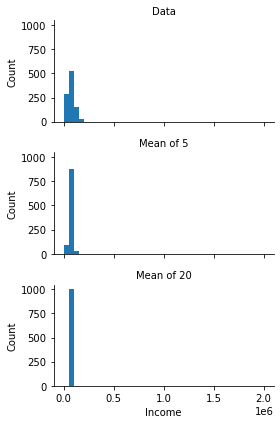

In [32]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 2000000], bins=40 )
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

In [33]:
# 부트스트랩: 현재 있는 표본에서 추가적으로 표본을 복원추출해서 각 표본에 대한 통계량과 모델을 다시 계산=>모수의 표본분포를 쉽게 추정하는 방법

results = []

for nrepeat in range(1000):
    sample = resample(loans_income) #기존 샘플에서 다시 복원추출
    results.append(sample.median()) #복원추출한 샘플의 통계량을 기록
results = pd.Series(results)

print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}') #복원추출한 샘플들의 중간값의 평균값 -> 모평균 추정
print(f'std. error: {results.std()}') #복원추출한 샘플들의 중간값의 표준편차 -> 모표준편차 추정

original: 62000.0
bias: -83.6710000000021
std. error: 228.6695509299883
